## Linear Regression with Scikit-Learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Salary_Data.csv')
X = df.iloc[:, 0]   #select all variables except the dependent ones
y = df.iloc[:, 1]   
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


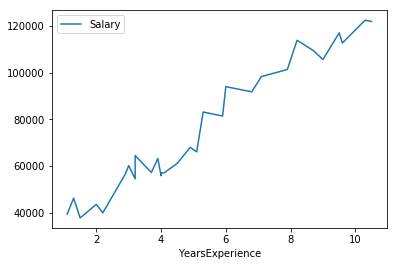

In [4]:
#A simple visualization
df.plot('YearsExperience', 'Salary')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=12)

X_train = X_train.values.reshape(-1, 1) 
            # this is required when there is only a single feature. 
                #it's because the regression function expects a two dim array

In [6]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
y_pred = regressor.predict(X_test.values.reshape(-1, 1))

In [8]:
y_pred

array([ 56431.75832635, 100545.1735005 ,  81773.50746894,  68633.34124686,
        38598.67559637,  93036.50708787,  47045.92531057,  72387.67445317])

In [9]:
y_test

7      54445.0
22    101302.0
18     81363.0
14     61111.0
1      46205.0
21     98273.0
4      39891.0
15     67938.0
Name: Salary, dtype: float64

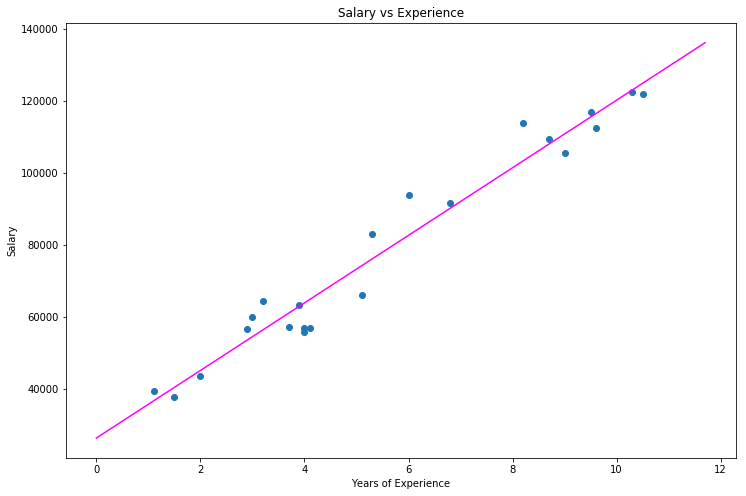

In [10]:
#visualize the results

fig = plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train)
plt.plot(np.arange(0, 12, 0.3), regressor.predict(np.arange(0, 12, 0.3).reshape(-1, 1)), color='magenta')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Multiple Linear Regression

In [11]:
df2 = pd.read_csv('50_Startups.csv')
df2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
X2 = df2.iloc[:, :-1]
y2 = df2['Profit']

In [13]:
# let's quickly one hot encode "State" column
X2 = pd.get_dummies(X2, columns=['State'])

#alternatively we can also recode the labels using scikit's LabelEncoder and OnehotEncoder

In [14]:
# Avoid dummy variable trap, remove last column
#X = X.iloc[:, :-1]
X2.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=12)

In [16]:
from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
y_pred2 = regressor2.predict(X_test2)
print(y_pred2)
print(y_test2)

[ 98473.09312708  56403.70786757 158270.86095944  75636.13635712
  74649.56464224 101168.96885193 117082.87870195  52482.35888245
 114551.03752356 151408.37242019]
28    103282.38
46     49490.75
7     155752.60
41     77798.83
36     90708.19
29    101004.64
21    111313.02
48     35673.41
19    122776.86
8     152211.77
Name: Profit, dtype: float64


## Polynomial Regression

In [18]:
#Let's use a simple dataset for illustration

df3 = pd.read_csv('Position_Salaries.csv')
X3 = df3.iloc[:, 1:2]   
y3 = df3.iloc[:, 2]

df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [19]:
X3.shape

(10, 1)

In [20]:
y3.shape

(10,)

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X3, y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Adding polynomial features using PolynomialFeatures class from sklearn's library

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
poly_reg_4 = PolynomialFeatures(degree=4)
X_poly_2 = poly_reg_2.fit_transform(X3)
X_poly_3 = poly_reg_3.fit_transform(X3)
X_poly_4 = poly_reg_4.fit_transform(X3)

In [27]:
X_poly_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [28]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y3)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y3)
lin_reg_poly_4 = LinearRegression().fit(X_poly_4, y3)

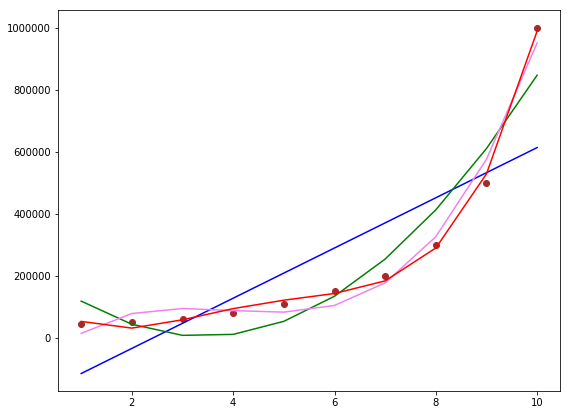

In [40]:
plt.figure(figsize=(9,7))
plt.scatter(X3, y3, color='brown')
plt.plot(X3, lin_reg.predict(X3), color='b')
plt.plot(X3, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X3)), color='green')
plt.plot(X3, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X3)), color='violet')
plt.plot(X3, lin_reg_poly_4.predict(poly_reg_4.fit_transform(X3)), color='red')
plt.show()

Note: This exercise is part of the "Machine_Learning_A-Z" course